In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import plot
import pyvis as py
import plotly.express as px

import holoviews as hv
from holoviews import opts
from bokeh.tile_providers import STAMEN_TONER

In [32]:
import pandas as pd
df = pd.read_csv("output.csv")

# Extract unique values from "node 1" and "node 2" columns
unique_values_node1 = df['node1'].unique()
unique_values_node2 = df['node2'].unique()

# Concatenate unique values into a single list
unique_values_combined = list(set(unique_values_node1) | set(unique_values_node2))

print("No of node present:",len(unique_values_combined))

No of node present: 3892


In [14]:
df = pd.read_csv("final.csv")
df

node1  \
0      Dancing With The Stars. Taniec z Gwiazdami   
1      Dancing With The Stars. Taniec z Gwiazdami   
2      Dancing With The Stars. Taniec z Gwiazdami   
3      Dancing With The Stars. Taniec z Gwiazdami   
4                                   Chris Jansing   
...                                           ...   
17257                          Take Me Out on FOX   
17258                       Angry Birds Toons DVD   
17259         Team Wallraff - Reporter undercover   
17260      Ca Sĩ Giấu Mặt - Hidden Singer Vietnam   
17261                              Young & Hungry   

                                     node2  
0                Twoja twarz brzmi znajomo  
1                    Hell's Kitchen Polska  
2                          Pierwsza miłość  
3                          TOP CHEF Polska  
4                              Morning Joe  
...                                    ...  
17257                   Kitchen Nightmares  
17258                              Michael  
17259  Team Wallraff - Reporter undercover  
17260                               tvBlue  
17261                       The Good Fight  

[17262 rows x 2 columns]

### Network Graph

In [11]:
df= pd.read_csv('modified_file.csv')
from pyvis.network import Network
got_net = Network(notebook=True, height="750px", width="100%", bgcolor="white", font_color="black")
got_net.barnes_hut()

sources = df["node1"]
targets = df["node2"]
#weights = df["Price"]

edge_data = zip(sources, targets)#, weights)

for e in edge_data:
    src = str(e[0]) 
    dst = str(e[1])  
    #w = e[2]
    got_net.add_node(src, src, title=src,color="blue")
    got_net.add_node(dst, dst, title=dst,color="red")
    #got_net.add_edge(src, dst, value=w,color="black")
    got_net.add_edge(src, dst,color="black")


neighbor_map = got_net.get_adj_list()

for node in got_net.nodes:
    node["title"] += "Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

got_net.show("outputfile.html")

outputfile.html


In [15]:
G = nx.from_pandas_edgelist(df, 'node1', 'node2')

#### Betweenness Centrality

In [16]:
betweenness_centrality = nx.betweenness_centrality(G)

In [17]:
import pandas as pd

# create a list of dictionaries from the betweenness centrality output
centrality_dict = {'Node': [], 'Betweenness centrality': []}
for node, centrality in betweenness_centrality.items():
    centrality_dict['Node'].append(node)
    centrality_dict['Betweenness centrality'].append(centrality)

# create a pandas DataFrame from the list of dictionaries
BC = pd.DataFrame.from_dict(centrality_dict)
BC


Node  Betweenness centrality
0     Dancing With The Stars. Taniec z Gwiazdami                0.000562
1                      Twoja twarz brzmi znajomo                0.000004
2                          Hell's Kitchen Polska                0.001368
3                                Pierwsza miłość                0.000203
4                                TOP CHEF Polska                0.002182
...                                          ...                     ...
3845                              FOX 12 Weather                0.000000
3846                             Club de Cuervos                0.000000
3847                                On The Money                0.000000
3848                       Angry Birds Toons DVD                0.000000
3849      Ca Sĩ Giấu Mặt - Hidden Singer Vietnam                0.000000

[3850 rows x 2 columns]

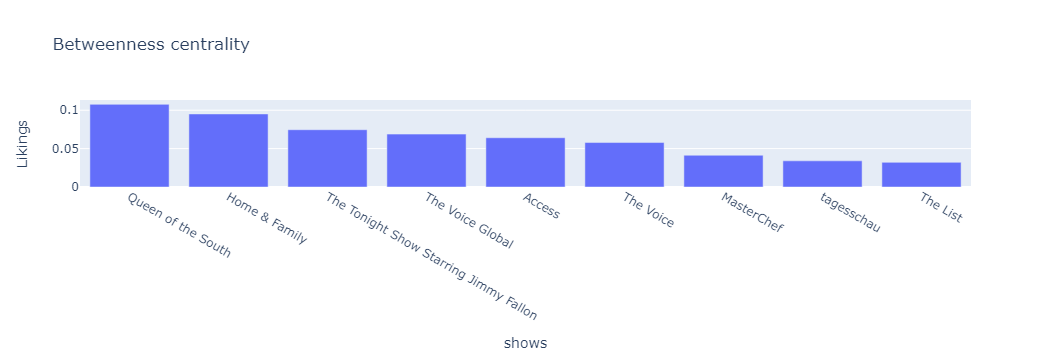

In [22]:
ji=BC.sort_values(by='Betweenness centrality',ascending=False)
BC_S=ji.head(10)
bet=pd.DataFrame(BC_S)

BCi = go.Figure(data=[go.Bar(x=bet['Node'], y=bet['Betweenness centrality'])])
BCi.update_layout(title='Betweenness centrality', xaxis_title='shows', yaxis_title='Likings')

C:\Users\hp\AppData\Local\Temp\ipykernel_17824\2837978335.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



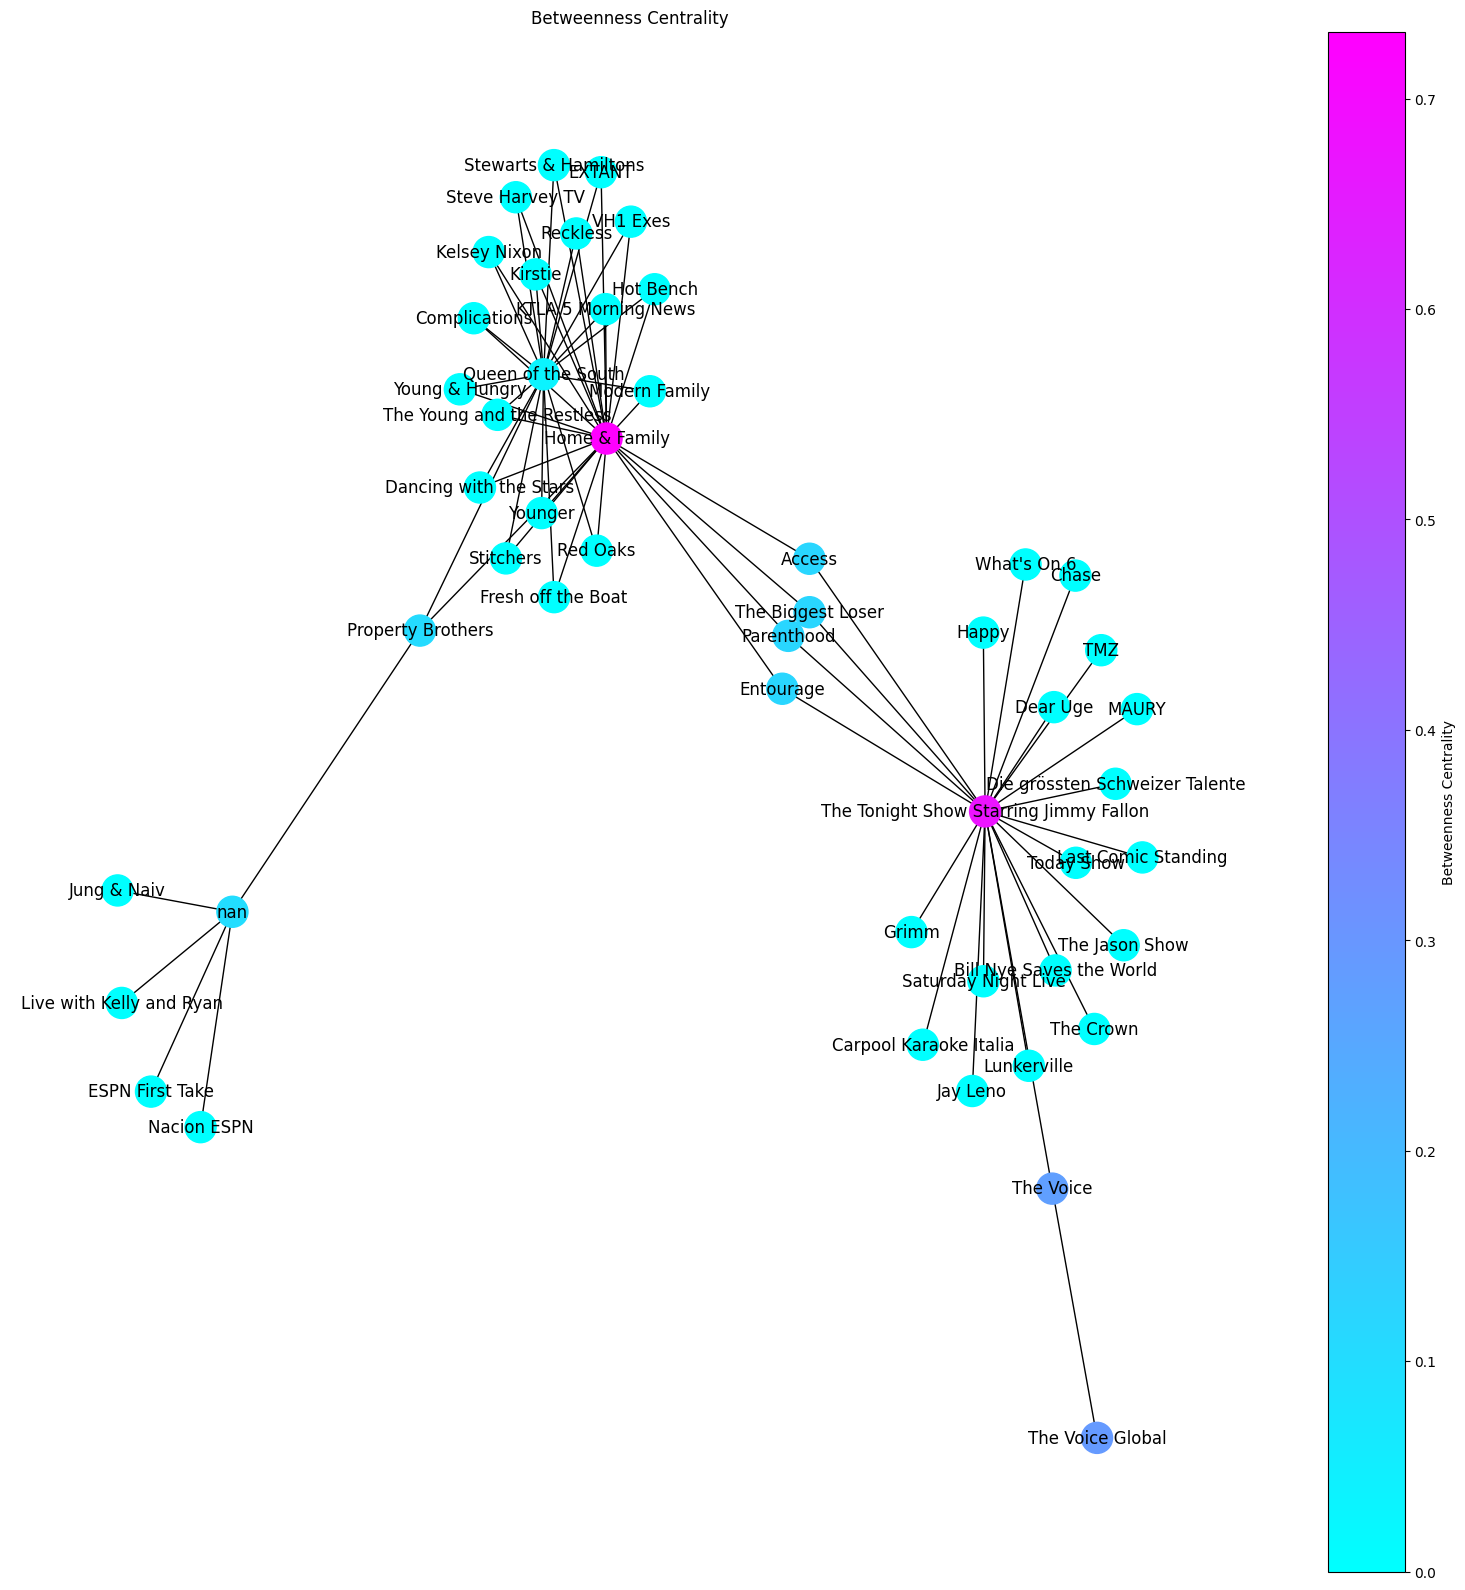

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
df_bc = pd.read_csv('final.csv')

# Assuming BC is your DataFrame containing betweenness centrality values
BC_df = BC.sort_values(by='Betweenness centrality', ascending=False).head(20)
df_filter = BC_df.head(5)
name_list = df_filter["Node"].tolist()
df_bc = df[df["node1"].isin(name_list)]
df_filter.rename(columns={'Node': 'node1'}, inplace=True)
df_merged = pd.merge(df_bc, df_filter, on='node1', how='left')

top_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:50]  
G1_sub = G1.subgraph(top_nodes)

# Calculate layout for the subgraph
pos = nx.spring_layout(G1_sub)

# Create a list of colors based on betweenness centrality values for the subgraph
node_colors = [betweenness_centrality[node] for node in G1_sub.nodes()]

# Draw the subgraph with node colors based on betweenness centrality
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G1_sub, pos, node_color=node_colors, cmap='cool', node_size=500)

# Draw the edges
nx.draw_networkx_edges(G1_sub, pos)

# Add labels to the nodes
nx.draw_networkx_labels(G1_sub, pos)

# Add a color bar for the node colors
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Betweenness Centrality', ax=plt.gca())  # Specify the axes for the colorbar

# Display the plot
plt.title("Betweenness Centrality")
plt.axis('off')
plt.show()



### Degree Centrality

In [23]:
deg_centrality = nx.degree_centrality(G)

In [24]:
deg_dict = {'Node': [], 'deg_centrality': []}
for node, centrality in deg_centrality.items():
    deg_dict['Node'].append(node)
    deg_dict['deg_centrality'].append(centrality)

DC = pd.DataFrame.from_dict(deg_dict)
DC

Node  deg_centrality
0     Dancing With The Stars. Taniec z Gwiazdami        0.001039
1                      Twoja twarz brzmi znajomo        0.000779
2                          Hell's Kitchen Polska        0.001299
3                                Pierwsza miłość        0.001039
4                                TOP CHEF Polska        0.001559
...                                          ...             ...
3845                              FOX 12 Weather        0.000260
3846                             Club de Cuervos        0.000260
3847                                On The Money        0.000260
3848                       Angry Birds Toons DVD        0.000260
3849      Ca Sĩ Giấu Mặt - Hidden Singer Vietnam        0.000260

[3850 rows x 2 columns]

In [25]:
ji=DC.sort_values(by='deg_centrality',ascending=False)
sui=ji.head(20)
suii=pd.DataFrame(sui)
DCi = go.Figure(data=[go.Bar(x=suii['Node'], y=suii['deg_centrality'])])
DCi.update_layout(title='Degree_Centrality', xaxis_title='TV Show', yaxis_title='Liking')


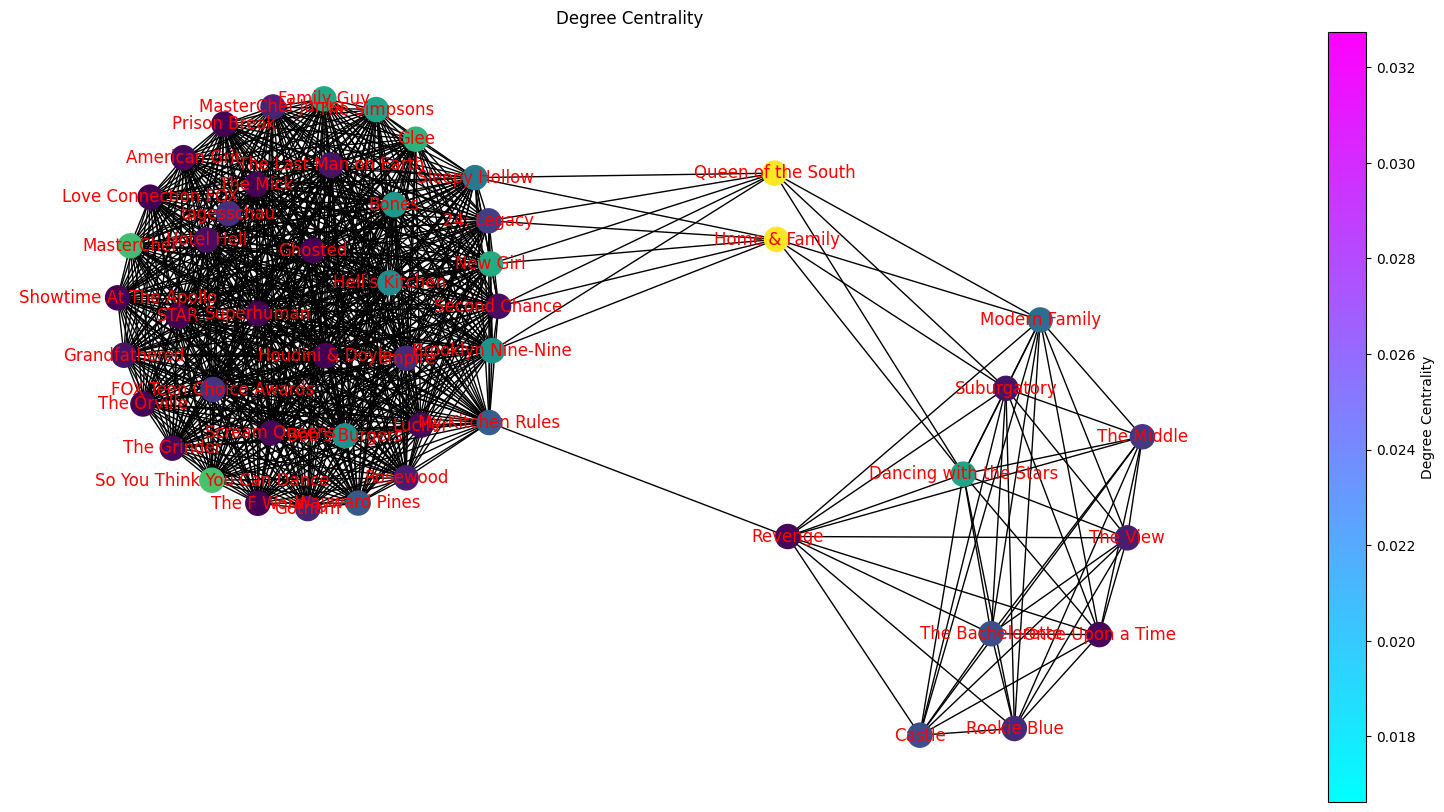

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.from_pandas_edgelist(df, 'node1', 'node2')

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality and select the top nodes
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:50]  # Adjust the number of nodes here

# Create a subgraph containing only the top nodes and their edges
G_sub = G.subgraph(top_nodes)

# Calculate layout for the subgraph (using kamada_kawai_layout for better spacing)
pos = nx.kamada_kawai_layout(G_sub)

# Create a list of colors based on degree centrality values for the subgraph
node_colors = [degree_centrality[node] for node in G_sub.nodes]

plt.figure(figsize=(20,10))
nx.draw_networkx(G_sub, pos, node_color=node_colors, with_labels=False)
nx.draw_networkx_labels(G_sub, pos, font_color='red')

sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Degree Centrality', ax=plt.gca())

plt.title("Degree Centrality")
plt.axis('off') 
plt.show()


### Closeness Centrality

In [27]:
closeness_centrality = nx.closeness_centrality(G)

In [28]:
clo_dict = {'Node': [], 'closeness_centrality': []}
for node, centrality in closeness_centrality.items():
    clo_dict['Node'].append(node)
    clo_dict['closeness_centrality'].append(centrality)

iop=pd.DataFrame.from_dict(clo_dict)
vii=iop.sort_values(by='closeness_centrality',ascending=False)
vii

Node  closeness_centrality
414                              Queen of the South              0.270295
412                                   Home & Family              0.268560
593                                          Access              0.264773
799          The Tonight Show Starring Jimmy Fallon              0.255884
772                                       The Voice              0.252957
...                                             ...                   ...
3528                                 Pikku Kakkonen              0.085414
3546                   برنامج فن الحياة - RT Arabic              0.085295
3746             برنامج رحلة في الذاكرة - RT Arabic              0.085293
2759                                   Rischiatutto              0.078704
3606  The Circus: Inside the Biggest Story on Earth              0.078704

[3850 rows x 2 columns]

In [29]:
vii=vii.head(20)
vi=pd.DataFrame(vii)
clc = go.Figure(data=[go.Bar(x=vi['Node'], y=vi['closeness_centrality'])])
clc.update_layout(title='closeness_centrality', xaxis_title='TV Show', yaxis_title='Linking')


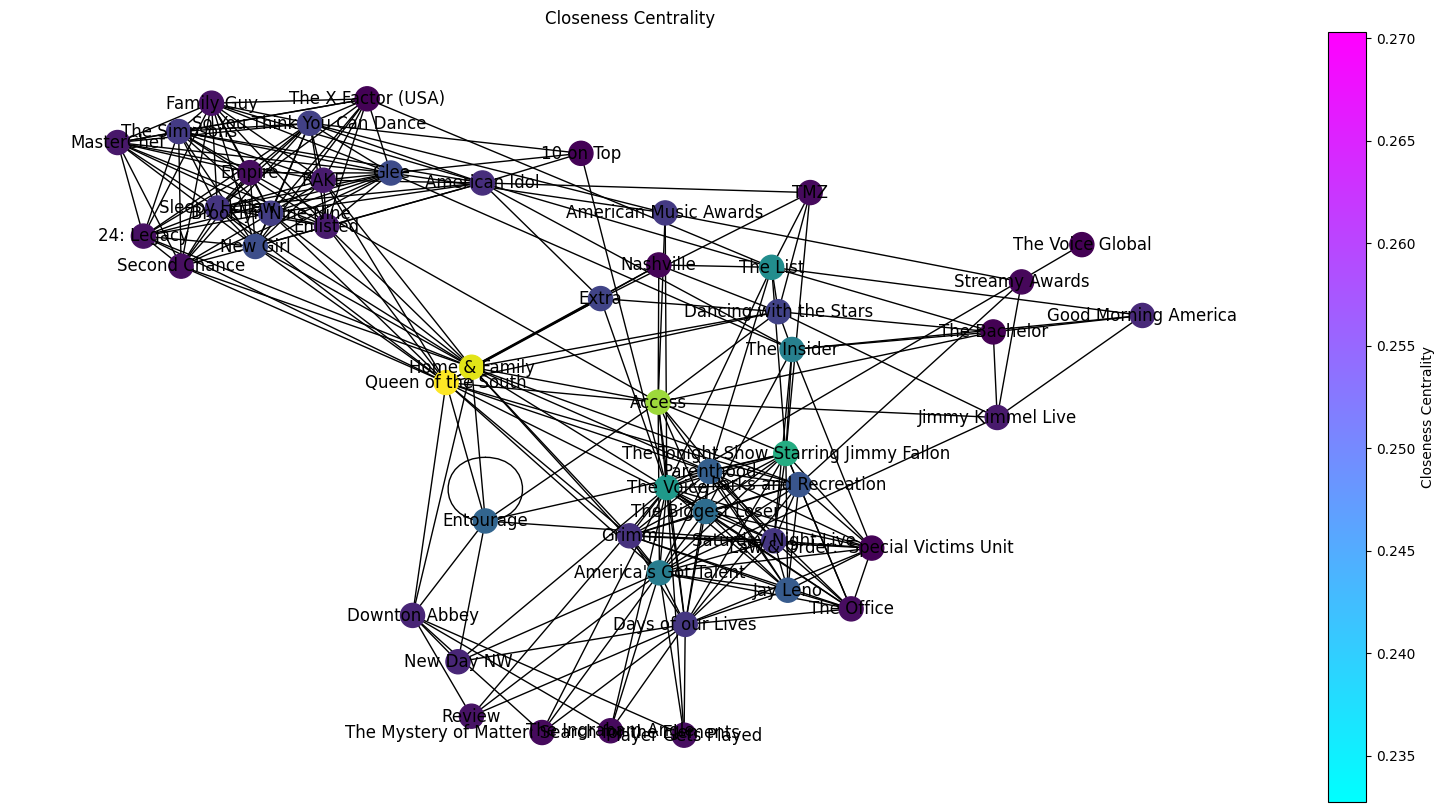

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.from_pandas_edgelist(df, 'node1', 'node2')

# Calculate closeness centrality
close_centrality = nx.closeness_centrality(G)

# Sort nodes based on closeness centrality and select top nodes
top_nodes = sorted(close_centrality, key=close_centrality.get, reverse=True)[:50]  # Adjust the number of nodes here

# Subgraph containing only the top nodes and their edges
G_sub = G.subgraph(top_nodes)

# Calculate layout for the subgraph
pos = nx.spring_layout(G_sub, seed=42)

# Create a list of colors based on closeness centrality values for the subgraph
node_colors = [close_centrality[node] for node in G_sub.nodes]

# Draw the subgraph with node colors based on closeness centrality
plt.figure(figsize=(20, 10))
nx.draw_networkx(G_sub, pos, node_color=node_colors, with_labels=False)
nx.draw_networkx_labels(G_sub, pos)

# Create a colorbar to show the closeness centrality values
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Closeness Centrality', ax=plt.gca())

# Set the title of the plot
plt.title("Closeness Centrality")
plt.axis('off')  # Turn off axis
plt.show()


### Eigen Centrality

In [31]:
eigen_centrality = nx.eigenvector_centrality(G)

In [32]:
eig_dict = {'Node': [], 'eigen_centrality': []}
for node, centrality in eigen_centrality.items():
    eig_dict['Node'].append(node)
    eig_dict['eigen_centrality'].append(centrality)
fi=pd.DataFrame.from_dict(eig_dict)
fi

Node  eigen_centrality
0     Dancing With The Stars. Taniec z Gwiazdami      3.385224e-05
1                      Twoja twarz brzmi znajomo      1.076350e-06
2                          Hell's Kitchen Polska      2.123969e-03
3                                Pierwsza miłość      5.312320e-07
4                                TOP CHEF Polska      4.188537e-05
...                                          ...               ...
3845                              FOX 12 Weather      1.745898e-05
3846                             Club de Cuervos      4.432037e-09
3847                                On The Money      1.195888e-06
3848                       Angry Birds Toons DVD      1.565551e-07
3849      Ca Sĩ Giấu Mặt - Hidden Singer Vietnam      4.432037e-09

[3850 rows x 2 columns]

In [35]:
fii=fi.sort_values(by='eigen_centrality',ascending=False)
fiii=fii.head(10)
fiv=pd.DataFrame(fiii)
eig = go.Figure(data=[go.Bar(x=fiv['Node'], y=fii['eigen_centrality'])])
eig.update_layout(title='eigen_centrality', xaxis_title='TV Show', yaxis_title='Likings')


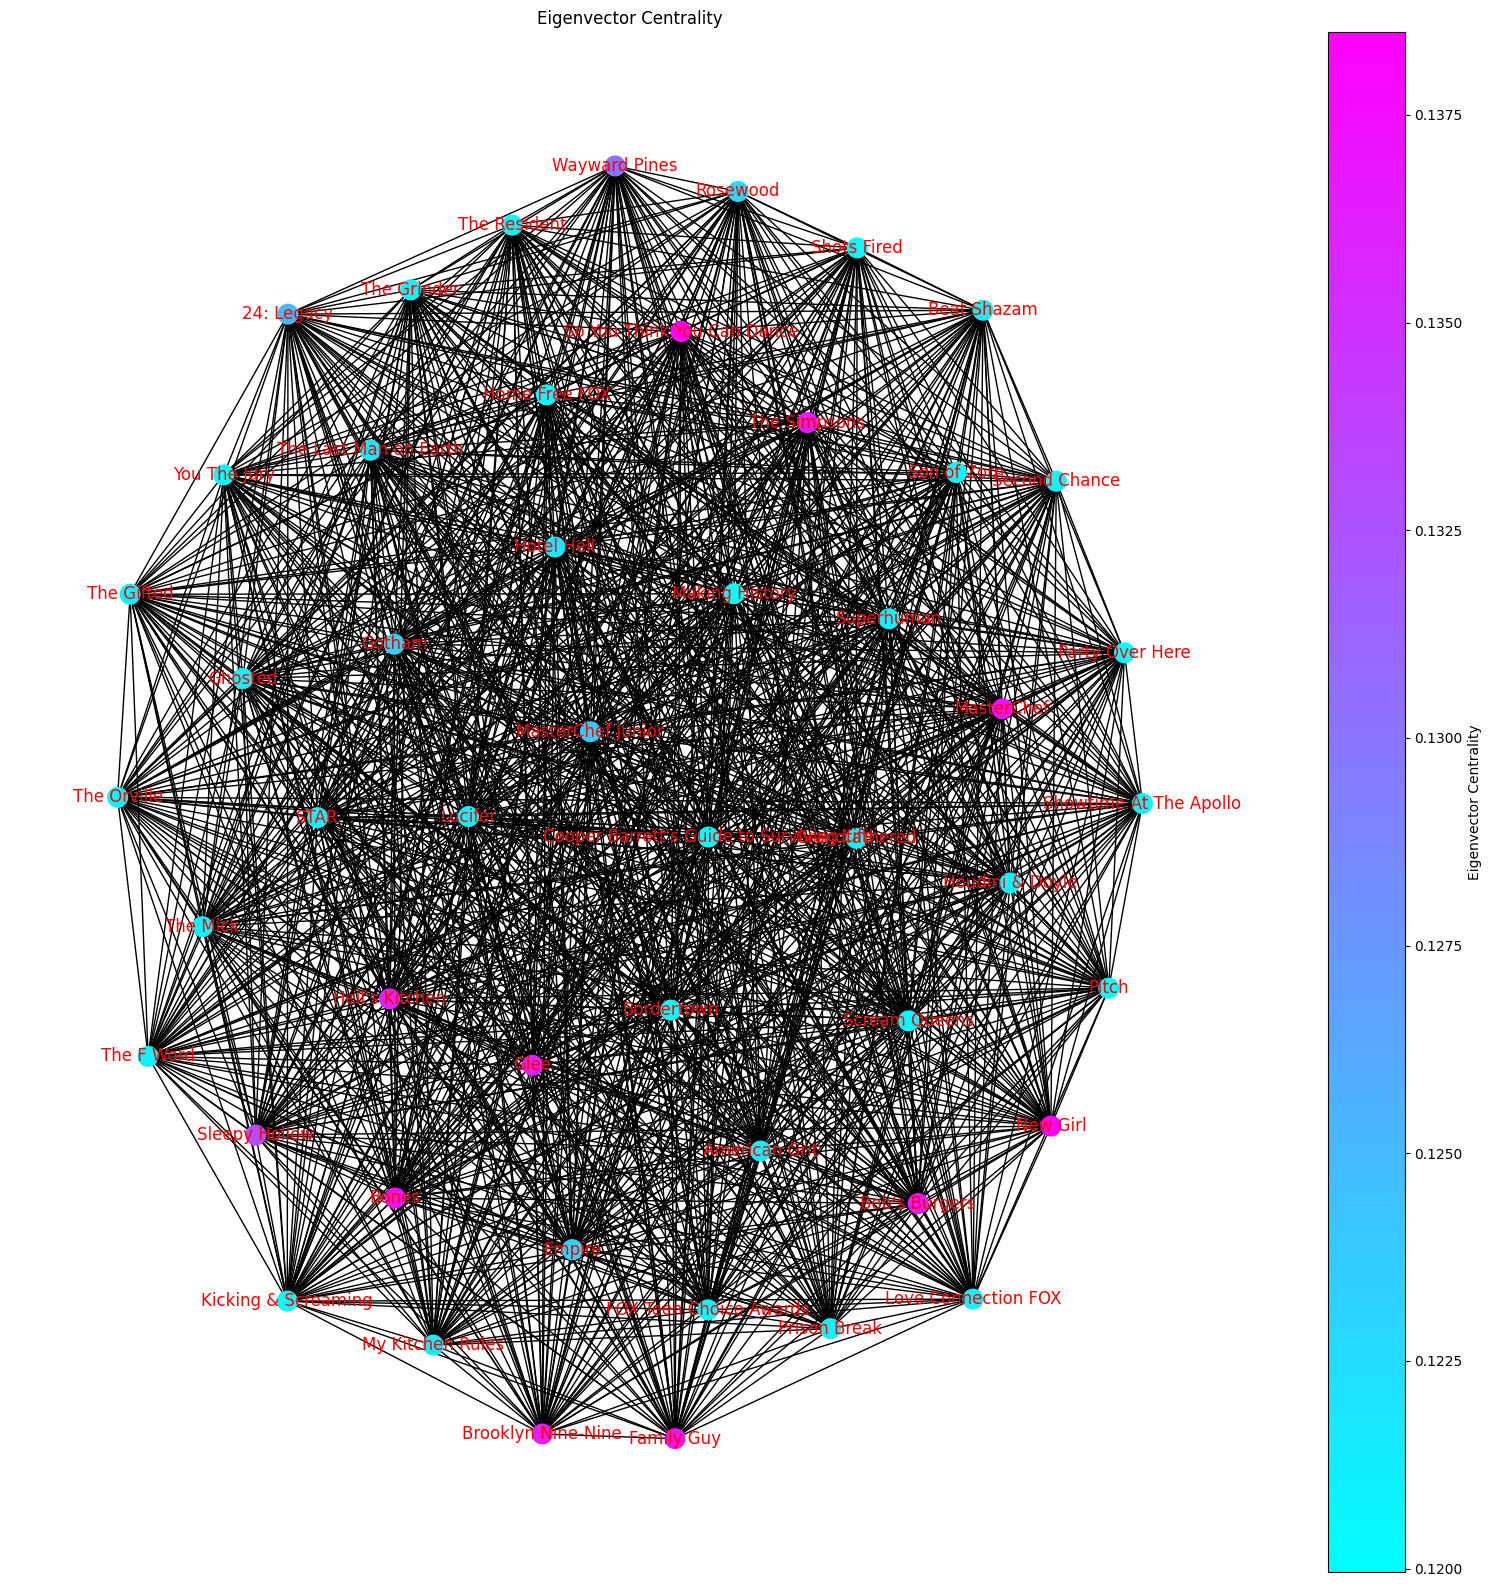

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort nodes based on eigenvector centrality and select top nodes
top_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:50]  # Adjust the number of nodes here

# Subgraph containing only the top nodes and their edges
G_sub = G.subgraph(top_nodes)

# Calculate layout for the subgraph
pos = nx.spring_layout(G_sub, seed=42)

# Create a list of colors based on eigenvector centrality values for the subgraph
node_colors = [eigenvector_centrality[node] for node in G_sub.nodes]

# Draw the subgraph with node colors based on eigenvector centrality
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, cmap='cool', node_size=200)

# Draw the edges
nx.draw_networkx_edges(G_sub, pos)
nx.draw_networkx_labels(G_sub, pos, font_color='red')
# Add a color bar for the node colors
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Eigenvector Centrality', ax=plt.gca())  # Specify the axes for the colorbar

# Display the plot
plt.title("Eigenvector Centrality")
plt.axis('off')
plt.show()


In [39]:
harmonic_centrality = nx.harmonic_centrality(G)
eig_dict = {'Node': [], 'harmonic_centrality': []}
for node, centrality in harmonic_centrality.items():
    eig_dict['Node'].append(node)
    eig_dict['harmonic_centrality'].append(centrality)
fi=pd.DataFrame.from_dict(eig_dict)
fi

Node  harmonic_centrality
0     Relative Success with Tabatha Coffey           835.317027
1                                Powerless           620.536314
2                             Wake Up Call           587.623446
3                                     taff           695.734604
4                           Shopping Queen           694.855483
...                                    ...                  ...
3845                             30 minuts           743.520274
3846       Have You Been Paying Attention?           721.374120
3847                    Bước Nhảy Ngàn Cân           451.551307
3848             Na językach - program TVN           560.860945
3849                       9 News Adelaide           509.318534

[3850 rows x 2 columns]

In [40]:
fii=fi.sort_values(by='harmonic_centrality',ascending=False)
fiii=fii.head(10)
fiv=pd.DataFrame(fiii)
eig = go.Figure(data=[go.Bar(x=fiv['Node'], y=fii['harmonic_centrality'])])
eig.update_layout(title='harmonic_centrality', xaxis_title='TV Show', yaxis_title='Likings')


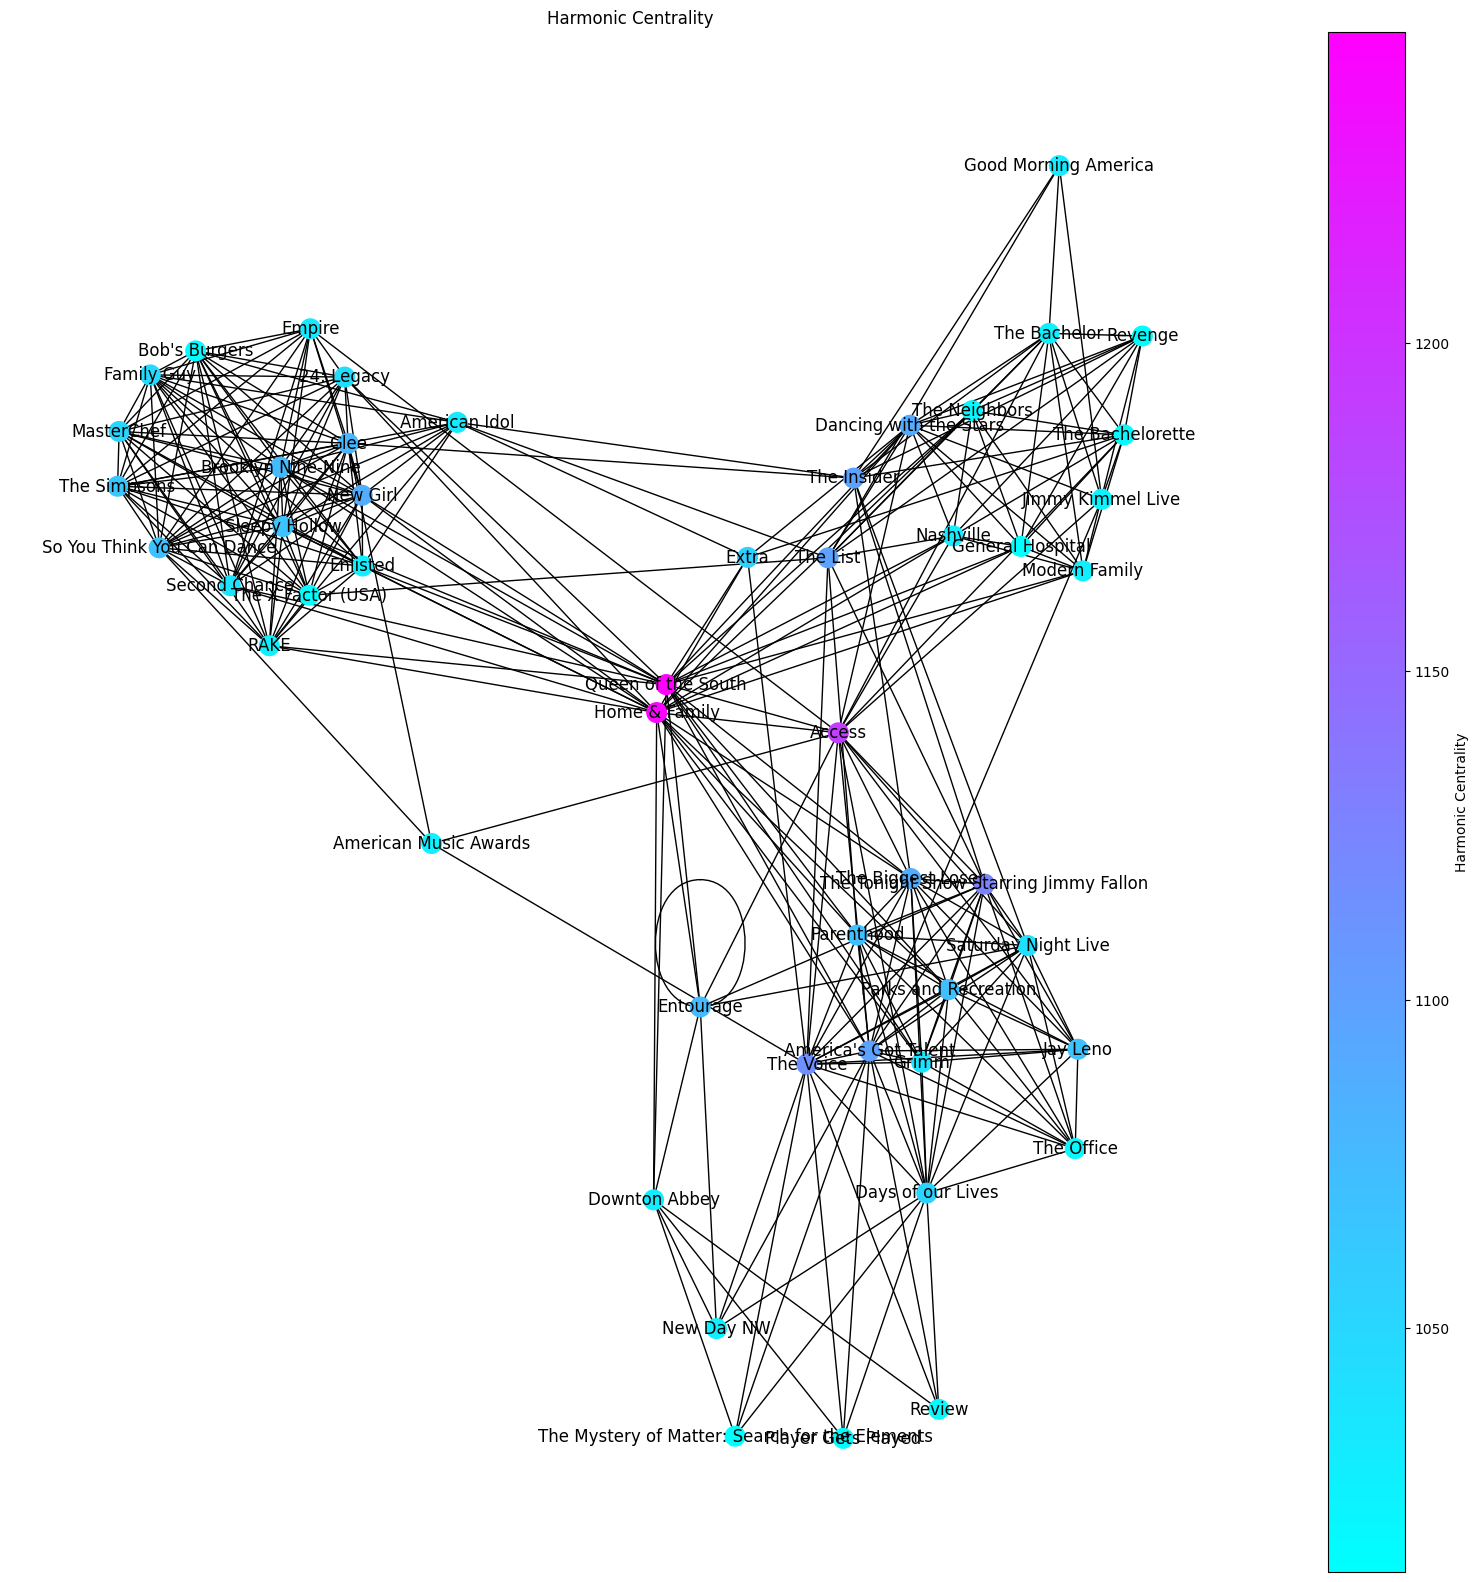

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

harmonic_centrality = nx.harmonic_centrality(G)

top_nodes = sorted(harmonic_centrality, key=harmonic_centrality.get, reverse=True)[:50]  # Adjust the number of nodes here

G_sub = G.subgraph(top_nodes)

pos = nx.spring_layout(G_sub, seed=42)

node_colors = [harmonic_centrality[node] for node in G_sub.nodes]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, cmap='cool', node_size=200)
nx.draw_networkx_edges(G_sub, pos)
nx.draw_networkx_labels(G_sub, pos)
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Harmonic Centrality', ax=plt.gca())  # Specify the axes for the colorbar

plt.title("Harmonic Centrality")
plt.axis('off')
plt.show()


### Cliques

In [38]:
G = nx.from_pandas_edgelist(df, 'node1', 'node2')
cliques = list(nx.find_cliques(G))
print(len(cliques))

6332


#### ML Model Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df2=pd.read_csv('output1.csv')
# Assuming your data is in a pandas DataFrame with features and target column 'weight'
X = df2.drop(columns=['weight'])  # Features
y = df2['weight']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

print('r2 score:',r2_score(y_test,predictions))

Mean Squared Error: 28.094939380530974
r2 score: 0.9598286831526034


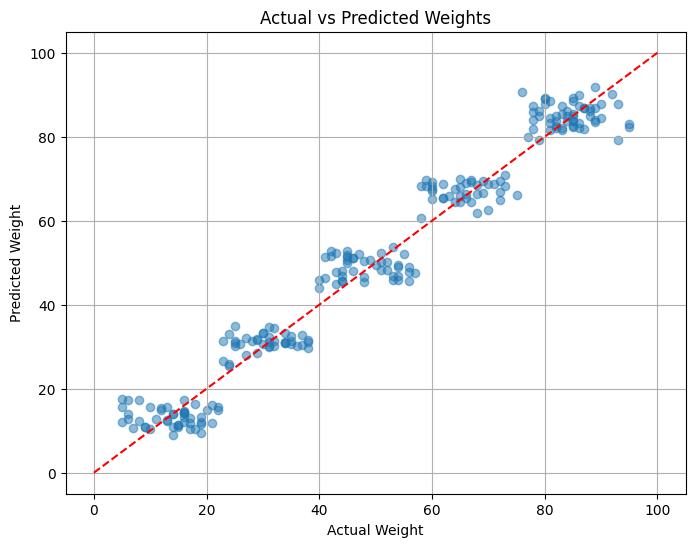

In [20]:
import matplotlib.pyplot as plt

# Assuming 'predictions' contains the predicted weights and 'y_test' contains the actual weights
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # Diagonal line representing perfect prediction
plt.title('Actual vs Predicted Weights')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.grid(True)
plt.show()

### ML Model Decision Tree

In [34]:
data=pd.read_csv('output.csv')
data

node1  node2  weight
0          0   1838      12
1          0   1744      71
2          0     14      64
3          0   2543      24
4          1   1009      63
...      ...    ...     ...
17257   3826   3844      82
17258   3830   3843      76
17259   1240   1240      76
17260   3876   3885      37
17261   3879   3886      57

[17262 rows x 3 columns]

In [70]:
import pandas as pd

# Load the data
data = pd.read_csv('output.csv')
ymin=5
def assign_cluster(weight):
    if weight < 90*0.2+ymin:
        return 1
    elif 90*0.2+ymin <= weight < 90*0.4+ymin:
        return 2
    elif 90*0.4+ymin <= weight < 90*0.6+ymin:
        return 3
    elif 90*0.6+ymin <= weight < 90*0.8+ymin:
        return 4
    else:
        return 5

# Create the 'cluster' column based on the 'weights' column
data['cluster'] = data['weight'].apply(assign_cluster)
data


node1  node2  weight  cluster
0          0   1838      12        1
1          0   1744      71        4
2          0     14      64        4
3          0   2543      24        2
4          1   1009      63        4
...      ...    ...     ...      ...
17257   3826   3844      82        5
17258   3830   3843      76        4
17259   1240   1240      76        4
17260   3876   3885      37        2
17261   3879   3886      57        3

[17262 rows x 4 columns]

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the feature columns
X = df2[['node1', 'node2', 'weight']]

# Define the target column
y = df2['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        28

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226

Confusion Matrix:
[[49  0  0  0  0]
 [ 0 64  0  0  0]
 [ 0  0 51  0  0]
 [ 0  0  0 34  0]
 [ 0  0  0  0 28]]


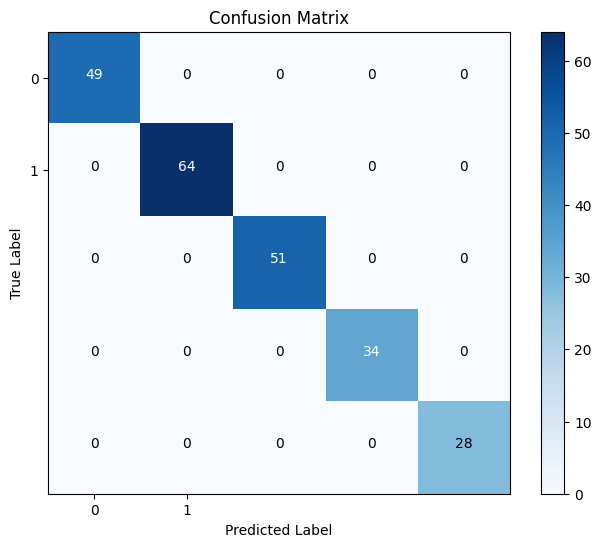

In [67]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Calculate confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])

# Add labels to the plot
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > confusion_matrix.max() / 2 else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [47]:
# Define the input features
node1 = int(input("Enter the node1 value: "))
node2 = int(input("Enter the node2 value: "))
weight = int(input("Enter the weight value: "))

# Create a new row in the dataset with the input features
new_row = pd.DataFrame({'node1': [node1], 'node2': [node2], 'weight': [weight]})

# Use the trained model to predict the new row
prediction = clf.predict(new_row)

# Print the prediction
print("Prediction:", prediction)

Enter the node1 value:  0
Enter the node2 value:  66
Enter the weight value:  67


Prediction: [3]


### Graph Convolutional Network (GCN)

In [98]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

x1,y1=[],[]
output1=pd.read_csv("output1.csv")

# Load the dataset
node1 = [int(x) for x in output1['node1']]
node2 = [int(x) for x in output1['node2']]
weights = [float(x) for x in output1['weight']]

# Create the graph data
edge_index = torch.tensor([node1, node2], dtype=torch.long)
edge_weight = torch.tensor(weights, dtype=torch.float)
x = torch.ones(max(max(node1), max(node2)) + 1, 1, dtype=torch.float)  # Assuming no node features
data = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 32, cached=True)
        self.conv2 = GCNConv(32, out_channels, cached=True)

    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        return x

# Create the model and train it
model = GCN(in_channels=1, out_channels=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_weight)
    loss = F.mse_loss(out, data.x)
    loss.backward()
    optimizer.step()

    

    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item()}')
        x1.append(epoch+1)
        y1.append(loss.item())

# Use the trained model for inference
with torch.no_grad():
    output = model(data.x, data.edge_index, data.edge_weight)

Epoch: 10, Loss: 0.4623424708843231
Epoch: 20, Loss: 0.358210951089859
Epoch: 30, Loss: 0.2941884398460388
Epoch: 40, Loss: 0.23901981115341187
Epoch: 50, Loss: 0.1897156983613968
Epoch: 60, Loss: 0.14652232825756073
Epoch: 70, Loss: 0.11143732070922852
Epoch: 80, Loss: 0.08404899388551712
Epoch: 90, Loss: 0.062325336039066315
Epoch: 100, Loss: 0.04541030898690224
Epoch: 110, Loss: 0.03256121277809143
Epoch: 120, Loss: 0.022933468222618103
Epoch: 130, Loss: 0.015872761607170105
Epoch: 140, Loss: 0.01078779622912407
Epoch: 150, Loss: 0.007198921870440245
Epoch: 160, Loss: 0.0047151087783277035
Epoch: 170, Loss: 0.003030354157090187
Epoch: 180, Loss: 0.0019105143146589398
Epoch: 190, Loss: 0.0011812123702839017
Epoch: 200, Loss: 0.0007159610977396369


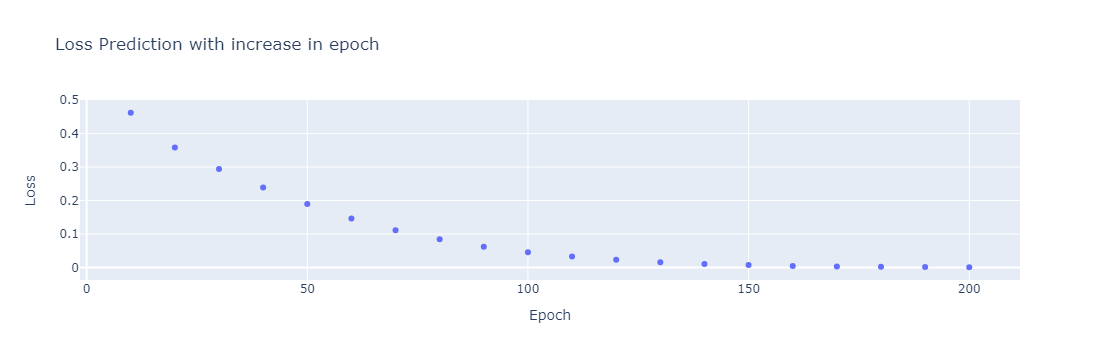

In [100]:
import plotly.express as px

# Convert the Matplotlib plot to an interactive Plotly plot
fig = px.scatter(x=x1, y=y1, labels={'x': 'Epoch', 'y': 'Loss'}, title='Loss Prediction with increase in epoch')
fig.show()